<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Tratamiento de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../datos/05_Modelo5/02_autorenew_sin_nulos.csv",index_col=0)
df.head()

,seller,offerType,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration,gama
0,private,offer,other,petrol,manually,unknown,150000,81.250156,480.0,The 90's,gama_alta
1,private,offer,coupe,diesel,manually,yes,125000,187.000000,18300.0,The 2010,gama_alta
2,private,offer,suv,diesel,automatic,unknown,125000,161.000000,9800.0,The 2000,gama_alta
3,private,offer,small car,petrol,manually,no,150000,74.000000,1500.0,The 2000,gama_alta
4,private,offer,small car,diesel,manually,no,90000,68.000000,3600.0,The 2000,gama_baja


# Cuales Escalar
- **price**: Precio del coche.
    - Sobre todo, los valores están muy segregados, en notación científica
- **powerCV**: Potencia del coche en caballos de vapor (CV).
    - Tenemos gran variedad y están segregados


<Axes: xlabel='powerCV', ylabel='Count'>

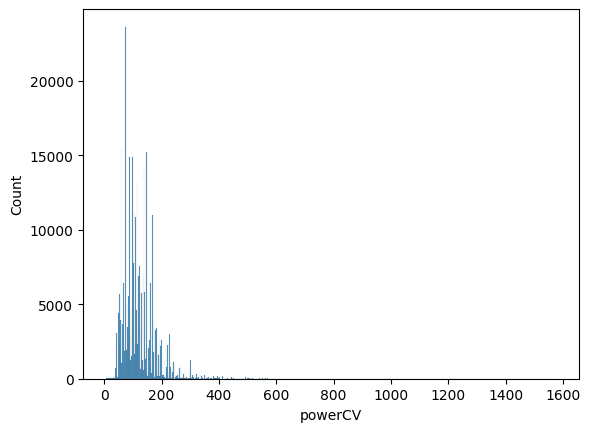

In [4]:
sns.histplot(x="powerCV",data=df)

<Axes: xlabel='price', ylabel='Count'>

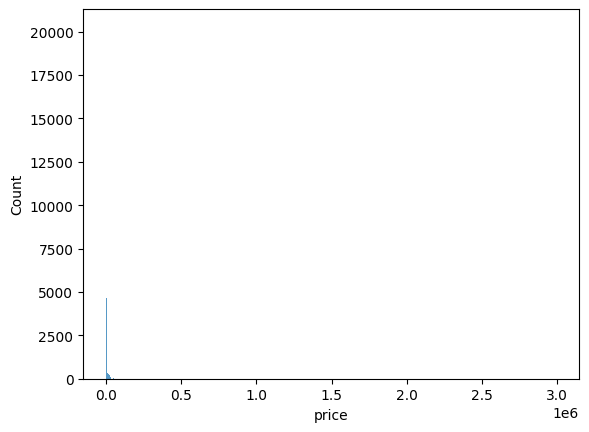

In [5]:
sns.histplot(x="price", data = df)

# Aplicamos Feature Scaling... Pero ¿Cual?
Tenemos los Siguientes pero antes:

### ¿Qué importancia tienen los outliers?
- **RobustScaler:** Es el mas "amigable" con los outliers,genera un rango de 0 a X (depende de cuantos datos tengamos) donde aún manteniendo la distribución los tenemos más juntos, si queremos darles mucho peso es nuestra mejor opción

- **StandardScaler:** También es amigable con los outliers, pero genera un rango de 0 a X mucho menos que el anterior, mantiene la distribución, si queremos darles algo de peso a los outliers, este es definitivamente nuestro amigo.

- **MinMaxScaler:** Genera un rango de 0 a 1 donde mantiene la distribución original pero está todo mucho más comprimido, aquí los outliers no se van a poder apreciar, así que si no te interesan y tus datos no están normalizados... es tu opción

- **Normalizer:** Tus datos están normalizados y no te interesan los outliers?, Está es tu opción, Genera un Rango de -1 a 1 en donde mantiene la distribución (como el resto). Es solo para datos normalizados, algo que veremos poco por aquí... 




### Resumiendo, ¿Cuál elijo?

Necesito los outliers, voy a realizar RobustScaler y StandardScaler y a compararlos para ver cual me conviene más

In [6]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["price", "powerCV"]])
df[["price_robust_scaler", "powerCV_robust_scaler"]] = datos_transf_robust

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["price", "powerCV"]])
df[["price_standard_scaler", "powerCV_standard_scaler"]] = datos_transf_stand

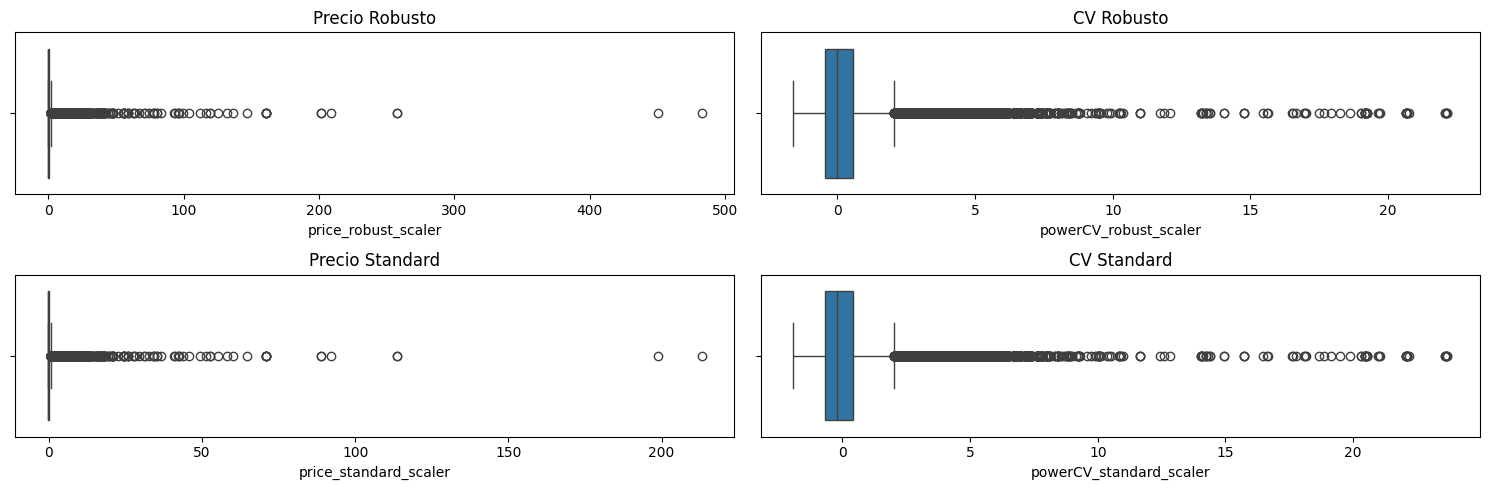

In [7]:
fig , axes = plt.subplots(nrows=2 , ncols=2, figsize = (15, 5))
sns.boxplot(x = "price_robust_scaler", data = df, ax = axes[0][0])
axes[0][0].set_title("Precio Robusto")
sns.boxplot(x = "powerCV_robust_scaler", data = df, ax = axes[0][1])
axes[0][1].set_title("CV Robusto")

sns.boxplot(x = "price_standard_scaler", data = df, ax = axes[1][0])
axes[1][0].set_title("Precio Standard")
sns.boxplot(x = "powerCV_standard_scaler", data = df, ax = axes[1][1])
axes[1][1].set_title("CV Standard")
plt.tight_layout()

Como podemos ver, ambas tienen la misma distribución

### ¿Con cuál me quedo?
Me quedo con el RobustScaler, considero bastante importante que nuestros datos y outliers tengan el peso que tienen aquí,
Teniendo en cuenta que nuestro análisis se centra en el precio que tendrán los coches en los próximos años, debemos estudiar los valores.
Teniendo en cuenta que el precio y la potencia son valores que me quedo, necesito sus outliers para poder calcular con la máxima precisión

In [8]:
df.drop(columns=["price_standard_scaler","powerCV_standard_scaler"],inplace=True)
df

,seller,offerType,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration,gama,price_robust_scaler,powerCV_robust_scaler
0,private,offer,other,petrol,manually,unknown,150000,81.250156,480.0,The 90's,gama_alta,-0.430645,-0.449105
1,private,offer,coupe,diesel,manually,yes,125000,187.000000,18300.0,The 2010,gama_alta,2.443548,1.147300
2,private,offer,suv,diesel,automatic,unknown,125000,161.000000,9800.0,The 2000,gama_alta,1.072581,0.754803
3,private,offer,small car,petrol,manually,no,150000,74.000000,1500.0,The 2000,gama_alta,-0.266129,-0.558554
4,private,offer,small car,diesel,manually,no,90000,68.000000,3600.0,The 2000,gama_baja,0.072581,-0.649130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356510,private,offer,other,other,unknown,unknown,20000,108.638535,2200.0,The 2000,unknown,-0.153226,-0.035649
356511,private,offer,convertible,petrol,automatic,no,125000,100.000000,1199.0,The 2000,gama_baja,-0.314677,-0.166057
356512,private,offer,bus,diesel,manually,no,150000,101.000000,9200.0,The 90's,gama_alta,0.975806,-0.150961
356513,private,offer,combi,diesel,manually,unknown,150000,99.000000,3400.0,The 2000,gama_alta,0.040323,-0.181153


In [9]:
df.to_csv("../../datos/05_Modelo5/03_autorenew_feature_scaling.csv")